In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

## Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Datasets/bank.csv'
import pandas as pd
df = pd.read_csv(path, delimiter=';')


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.shape

(4521, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
obj_cols = df.select_dtypes(include='object')


for col in obj_cols.columns:
  print(f'{col}: {df[col].unique()}')

job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital: ['married' 'single' 'divorced']
education: ['primary' 'secondary' 'tertiary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [ ]:
df['y'].value_counts(normalize=True)

,proportion
y,
no,0.88476
yes,0.11524


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


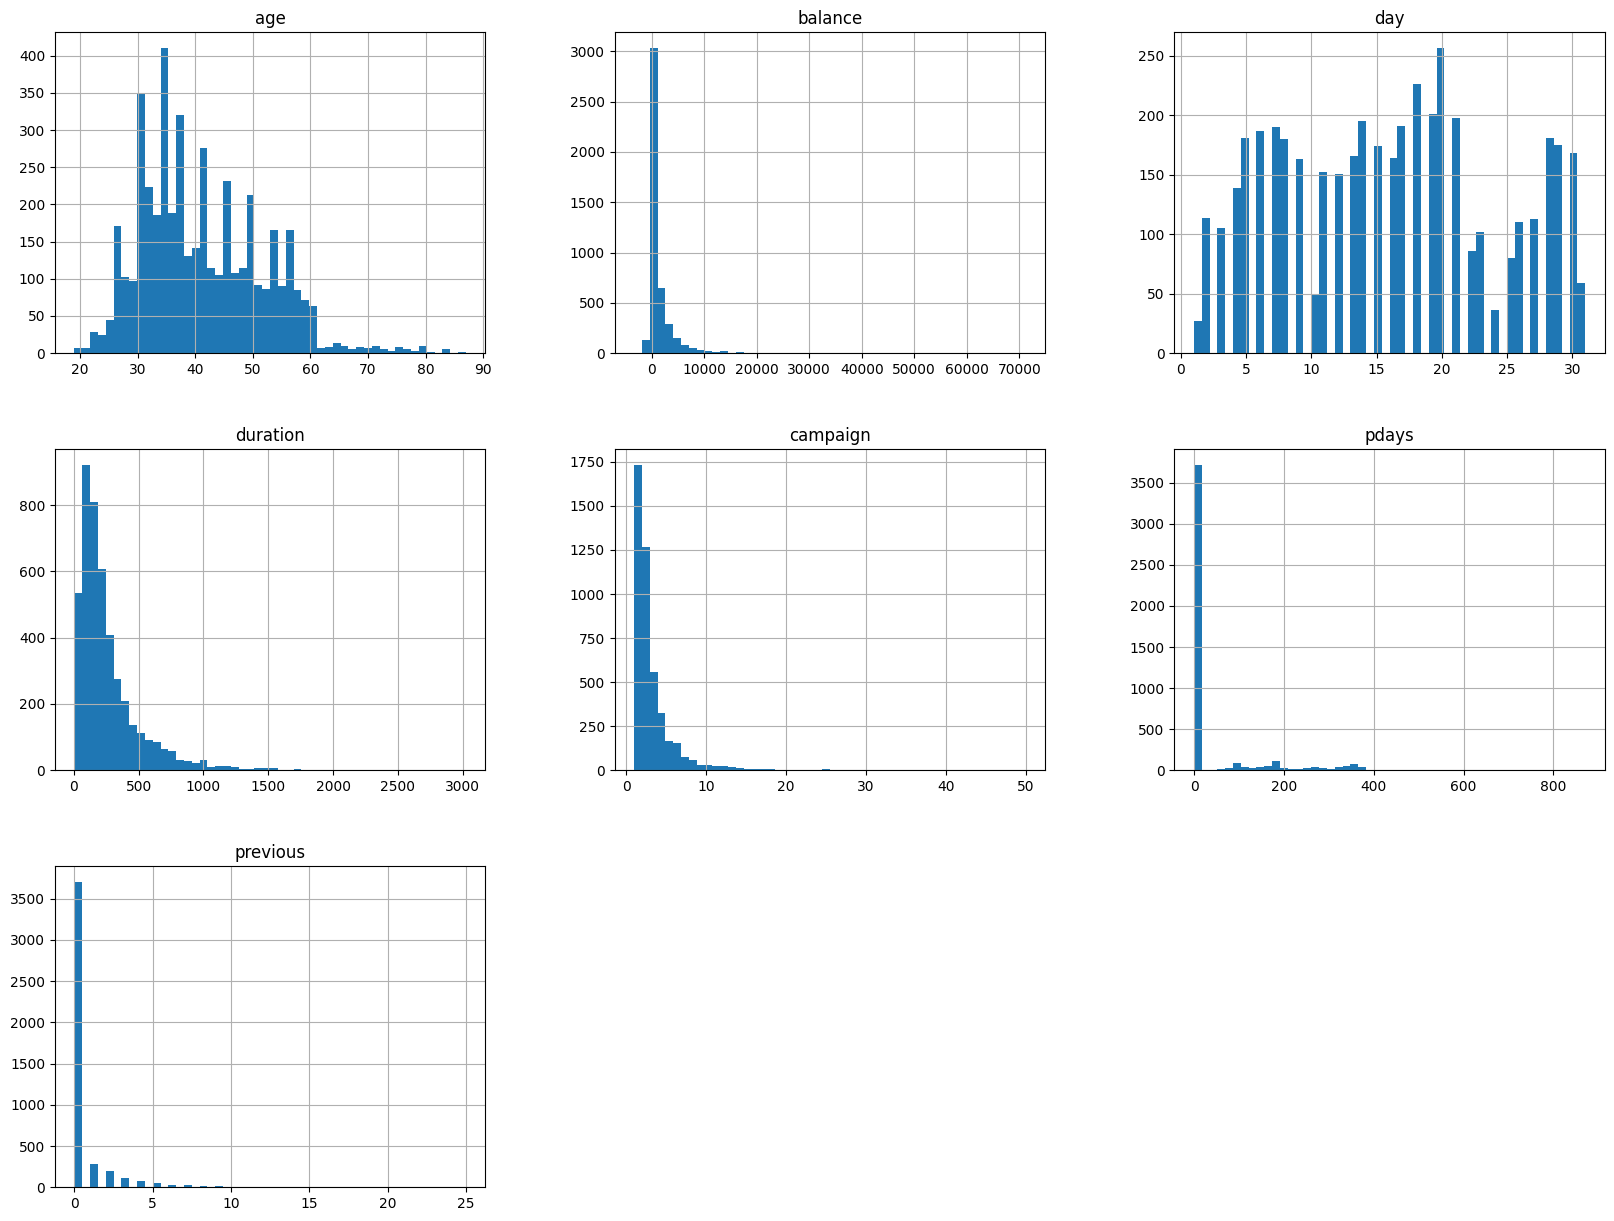

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print(train_set.shape)
print(test_set.shape)

(3616, 17)
(905, 17)


In [ ]:
print(train_set['y'].value_counts(normalize=True))
print(test_set['y'].value_counts(normalize=True))

y
no     0.88302
yes    0.11698
Name: proportion, dtype: float64
y
no     0.891713
yes    0.108287
Name: proportion, dtype: float64


In [ ]:
for col in train_set.columns:
    count = (train_set[col] == 'unknown').sum()
    print(f"{col}: {count} unknown(s)")

age: 0 unknown(s)
job: 32 unknown(s)
marital: 0 unknown(s)
education: 150 unknown(s)
default: 0 unknown(s)
balance: 0 unknown(s)
housing: 0 unknown(s)
loan: 0 unknown(s)
contact: 1050 unknown(s)
day: 0 unknown(s)
month: 0 unknown(s)
duration: 0 unknown(s)
campaign: 0 unknown(s)
pdays: 0 unknown(s)
previous: 0 unknown(s)
poutcome: 2964 unknown(s)
y: 0 unknown(s)


In [ ]:
print(train_set['contact'].head(10))

978     cellular
251     cellular
3139    cellular
1822    cellular
4445     unknown
3159    cellular
4299    cellular
2063    cellular
3815    cellular
2185    cellular
Name: contact, dtype: object


In [ ]:
print(train_set['contact'].value_counts())

contact
cellular     2325
unknown      1050
telephone     241
Name: count, dtype: int64


### Prepare the Data for Machine Learning Algorithms


In [ ]:
bank = train_set.drop(["y", "duration"],axis=1)
bank_labels = train_set["y"].copy()

In [ ]:
bank_test = test_set.drop(["y", "duration"],axis=1)
bank_labels_test = test_set["y"]

In [ ]:
bank_labels_test = bank_labels_test.map({'no': 0, 'yes': 1})

In [ ]:
print(bank)

      age            job   marital  education default  balance housing loan  \
978    34   entrepreneur  divorced   tertiary      no      262      no   no   
251    32     management   married   tertiary      no     2349      no   no   
3139   34     technician    single  secondary      no     1076      no   no   
1822   31     management   married   tertiary      no      156      no   no   
4445   46    blue-collar   married    primary      no      258     yes   no   
...   ...            ...       ...        ...     ...      ...     ...  ...   
4426   41         admin.   married   tertiary      no     1536      no   no   
466    34  self-employed   married  secondary      no     -370     yes   no   
3092   46     management   married   tertiary      no      523     yes   no   
3772   47     management    single   tertiary      no      440      no   no   
860    58    blue-collar   married    primary      no      309      no   no   

       contact  day month  campaign  pdays  previou

In [ ]:
bank['poutcome'].value_counts()

,count
poutcome,
unknown,2964
failure,388
other,158
success,106


In [ ]:
print(bank_labels)

978      no
251      no
3139     no
1822    yes
4445     no
       ... 
4426     no
466      no
3092     no
3772     no
860      no
Name: y, Length: 3616, dtype: object


### Data Cleaning

Handling numerical attributes

In [ ]:
bank_num = bank.select_dtypes(include=[np.number])
bank_num.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
bank_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3616 entries, 978 to 860
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       3616 non-null   int64
 1   balance   3616 non-null   int64
 2   day       3616 non-null   int64
 3   campaign  3616 non-null   int64
 4   pdays     3616 non-null   int64
 5   previous  3616 non-null   int64
dtypes: int64(6)
memory usage: 197.8 KB


In [ ]:
print(bank_num.describe())

               age       balance          day     campaign        pdays  \
count  3616.000000   3616.000000  3616.000000  3616.000000  3616.000000   
mean     41.229812   1415.979535    15.962942     2.832135    39.177268   
std      10.659083   2789.095311     8.240591     3.230350    98.286998   
min      19.000000  -1746.000000     1.000000     1.000000    -1.000000   
25%      33.000000     67.000000     9.000000     1.000000    -1.000000   
50%      39.000000    453.500000    16.000000     2.000000    -1.000000   
75%      49.000000   1500.000000    21.000000     3.000000    -1.000000   
max      87.000000  27359.000000    31.000000    50.000000   871.000000   

          previous  
count  3616.000000  
mean      0.543695  
std       1.728541  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      25.000000  


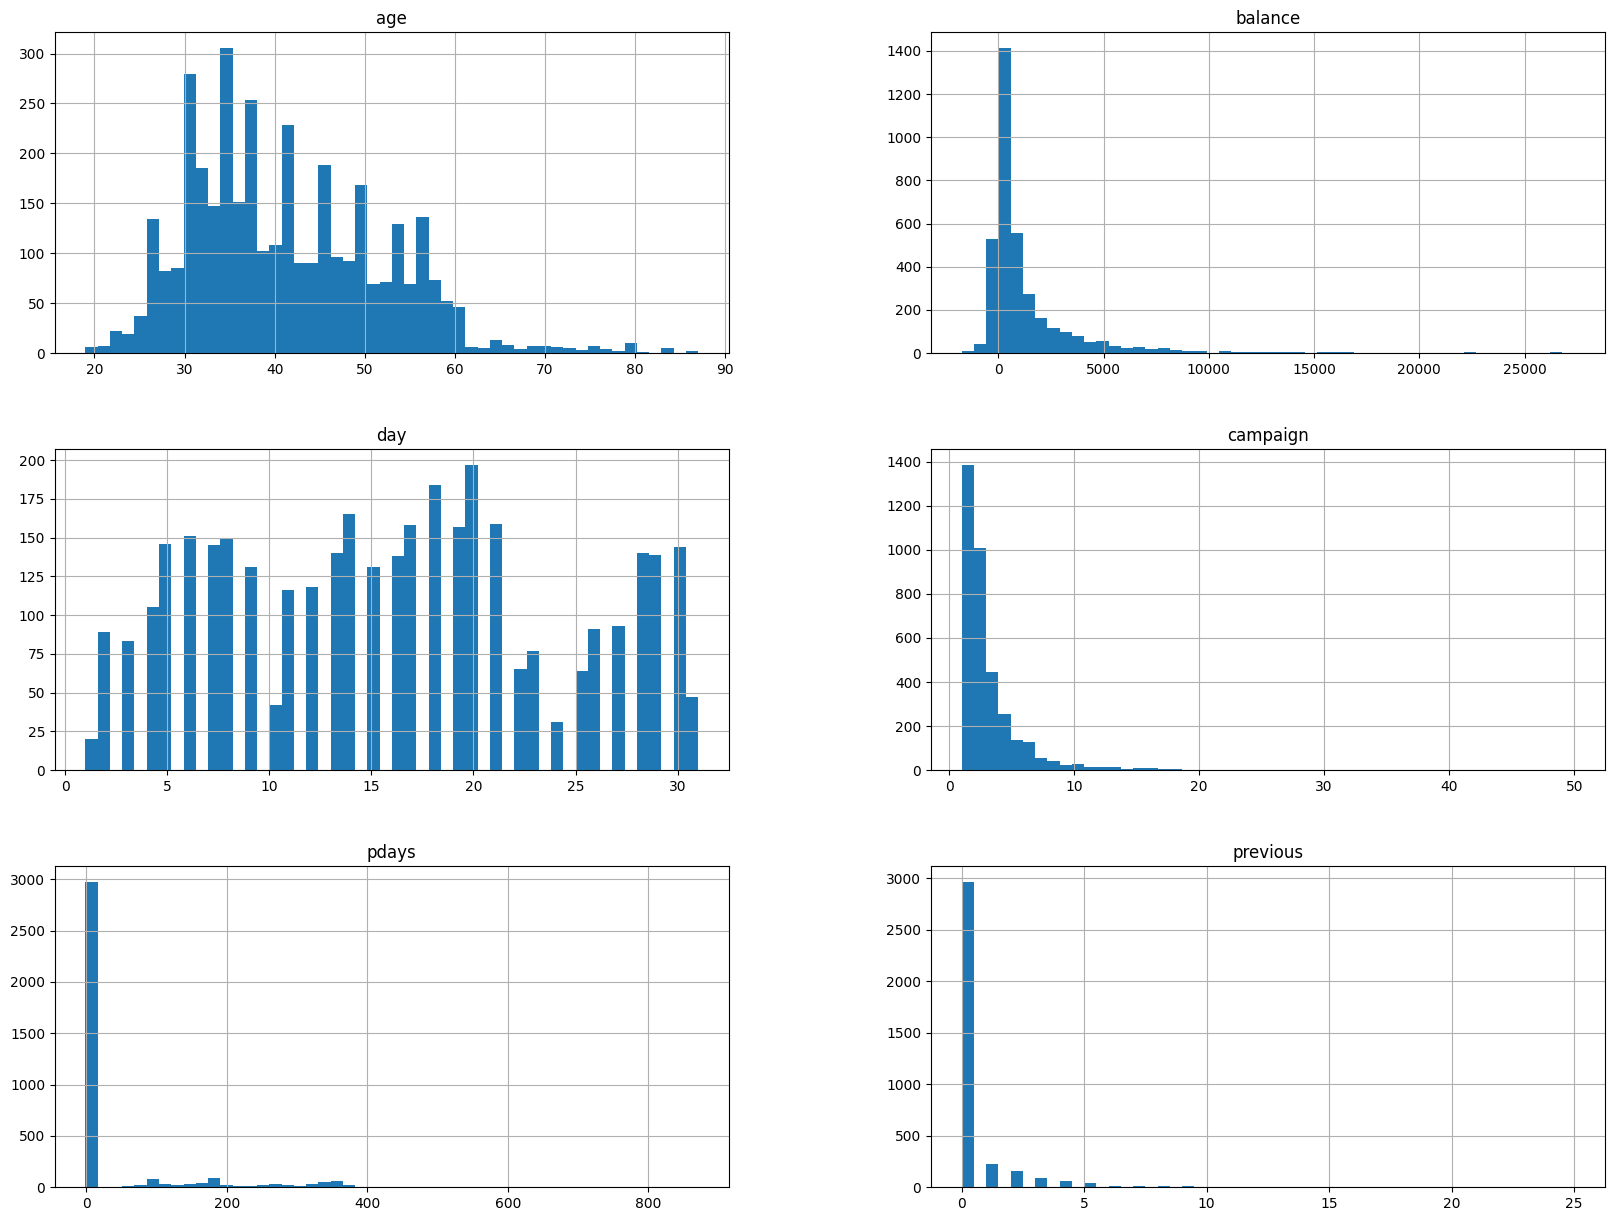

In [ ]:
bank_num.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
bank_num['pdays'] = np.where(bank_num['pdays'] == -1, 0, bank_num['pdays'])


In [ ]:
# # Shift balance to be positive
# bank_num['balance_shifted'] = bank_num['balance'] - bank_num['balance'].min()

# logged = ['balance_shifted', 'campaign', 'previous']

# # Then apply log1p
# bank_num['balance'] = np.log1p(bank_num['balance_shifted'])
# bank_num['campaign'] = np.log1p(bank_num['campaign'])
# bank_num['previous'] = np.log1p(bank_num['previous'])

# bank_num.drop('balance_shifted', axis=1, inplace=True)

# original_columns = bank_num.columns
# original_index = bank_num.index

# bank_num = pd.DataFrame(logged, columns=original_columns,
# index=original_index)

In [ ]:
# 1. Shift balance to be positive
bank_num['balance_shifted'] = bank_num['balance'] - bank_num['balance'].min()

# 2. Apply log1p to the shifted balance
bank_num['balance'] = np.log1p(bank_num['balance_shifted'])

# 3. Apply log1p to 'campaign' and 'previous'
for col in ['campaign', 'previous']:
    bank_num[col] = np.log1p(bank_num[col])

# 4. Drop the 'balance_shifted' column if you don't need it anymore
bank_num.drop('balance_shifted', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


# Apply scaler
bank_num_scaled = scaler.fit_transform(bank_num)


In [ ]:
original_columns = bank_num.columns
original_index = bank_num.index

bank_num = pd.DataFrame(bank_num_scaled, columns=original_columns,
index=original_index)

In [ ]:

# 1. Create a cross-tabulation of 'poutcome' and 'y'
# This shows the counts for each combination
crosstab_poutcome_y = pd.crosstab(df['poutcome'], df['y'])

print("Cross-tabulation of 'poutcome' and 'y':")
print(crosstab_poutcome_y)
print("-" * 30)

# 2. Calculate the proportion of 'yes' within the 'success' poutcome category
# Get the row for 'success'
success_row = crosstab_poutcome_y.loc['success']

# Get the count of 'yes' for success poutcome
success_yes_count = success_row['yes']

# Get the total count for success poutcome
success_total_count = success_row.sum()

# Calculate the percentage
percentage_yes_in_success = (success_yes_count / success_total_count) * 100 if success_total_count > 0 else 0

print(f"For 'poutcome' == 'success':")
print(f"  Number of 'yes': {success_yes_count}")
print(f"  Total number of outcomes: {success_total_count}")
print(f"  Percentage of 'yes': {percentage_yes_in_success:.2f}%")
print("-" * 30)

# 3. (Optional) Calculate the overall proportion of 'yes' in the entire dataset for comparison
overall_yes_count = df['y'].value_counts().get('yes', 0)
overall_total_count = len(df)
overall_percentage_yes = (overall_yes_count / overall_total_count) * 100 if overall_total_count > 0 else 0

print(f"Overall percentage of 'y' == 'yes' in the dataset: {overall_percentage_yes:.2f}%")

Cross-tabulation of 'poutcome' and 'y':
y           no  yes
poutcome           
failure    427   63
other      159   38
success     46   83
unknown   3368  337
------------------------------
For 'poutcome' == 'success':
  Number of 'yes': 83
  Total number of outcomes: 129
  Percentage of 'yes': 64.34%
------------------------------
Overall percentage of 'y' == 'yes' in the dataset: 11.52%


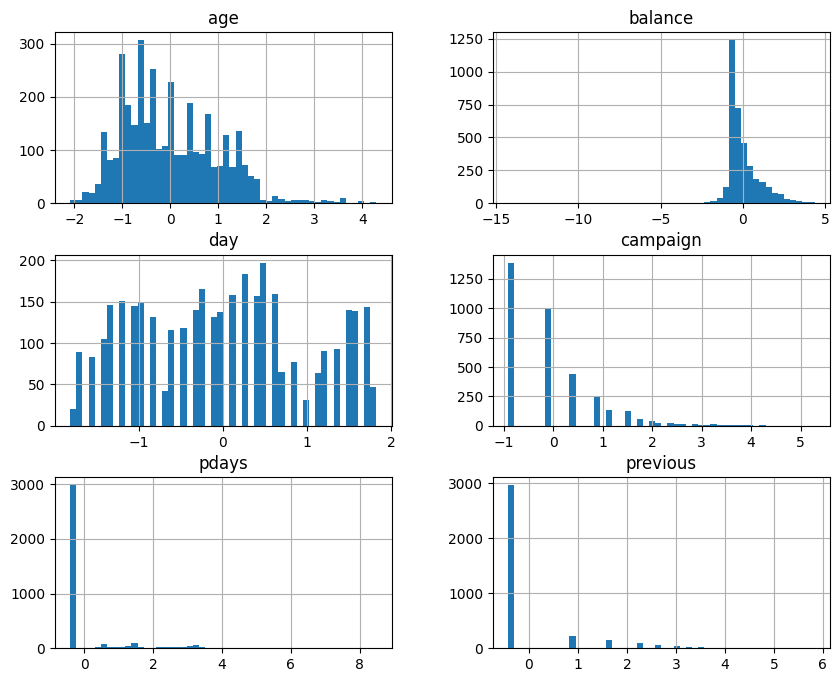

In [ ]:
bank_num.hist(bins=50, figsize=(10,8))
plt.show()

Now, lets handle categorical attributes.

In [ ]:
bank_cat = bank.select_dtypes(include=['object'])
bank_cat = bank.select_dtypes(include=['object']).copy()

bank_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
for col in bank_cat.columns:
    count = (train_set[col] == 'unknown').sum()
    print(f"{col}: {count} unknown(s)")

print(f'The nunber of rows in the above dataframe is {len(bank_cat)}')

job: 32 unknown(s)
marital: 0 unknown(s)
education: 150 unknown(s)
default: 0 unknown(s)
housing: 0 unknown(s)
loan: 0 unknown(s)
contact: 1050 unknown(s)
month: 0 unknown(s)
poutcome: 2964 unknown(s)
The nunber of rows in the above dataframe is 3616


In [ ]:
for col in bank_cat.columns:
    print(f'{col}: {bank_cat[col].unique()}')

job: ['entrepreneur' 'management' 'technician' 'blue-collar' 'admin.'
 'services' 'housemaid' 'self-employed' 'unemployed' 'student' 'retired'
 'unknown']
marital: ['divorced' 'married' 'single']
education: ['tertiary' 'secondary' 'primary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['nov' 'aug' 'may' 'jul' 'jun' 'oct' 'apr' 'sep' 'dec' 'feb' 'jan' 'mar']
poutcome: ['unknown' 'failure' 'success' 'other']


In [ ]:
#Label encode small categories
from sklearn.preprocessing import LabelEncoder
label_encode_cols = ['marital', 'default', 'housing', 'loan']
le = LabelEncoder()

for col in label_encode_cols:
    bank_cat[col] = le.fit_transform(bank_cat[col])

In [ ]:
one_hot_encode_cols = ['job', 'education', 'contact', 'month', 'poutcome']
bank_cat = pd.get_dummies(bank_cat, columns=one_hot_encode_cols)

In [ ]:
education_mapping = {
    'unknown': -1,  # Assign a distinct value like -1 for unknown
    'primary': 0,
    'secondary': 1,
    'tertiary': 2
}

# Apply the mapping to the 'education' column
df['education_encoded_ordinal'] = df['education'].map(education_mapping)

# Check the result
print(df[['education', 'education_encoded_ordinal']])

      education  education_encoded_ordinal
0       primary                          0
1     secondary                          1
2      tertiary                          2
3      tertiary                          2
4     secondary                          1
...         ...                        ...
4516  secondary                          1
4517   tertiary                          2
4518  secondary                          1
4519  secondary                          1
4520   tertiary                          2

[4521 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Option 1: If you still want to use manual mapping
education_preprocess = Pipeline(steps=[
    ('ordinal', FunctionTransformer(
        lambda x: x[['education']].apply(lambda col: col.map(education_mapping)), validate=False))
])

# --- OR --- (recommended option)
# Option 2: Cleaner - use OrdinalEncoder directly
education_preprocess = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['unknown', 'primary', 'secondary', 'tertiary']]))
])

binary_preprocess = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

contact_month_poutcome_marital_job_preprocess = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

num_preprocess = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('education_preprocess', education_preprocess, ['education']),
        ('binary_preprocess', binary_preprocess, ['default', 'housing', 'loan']),
        ('contact_month_poutcome_marital_job_preprocess', contact_month_poutcome_marital_job_preprocess,
         ['contact', 'month', 'poutcome', 'marital', 'job']),
        ('num_preprocess', num_preprocess, ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']),
    ],
    remainder='drop'
)

# Now fit_transform
bank_prepared = preprocessor.fit_transform(bank)


In [ ]:
bank_prepared = preprocessor.fit_transform(bank)


In [ ]:
preprocessor.get_feature_names_out()


array(['education_preprocess__education', 'binary_preprocess__default',
       'binary_preprocess__housing', 'binary_preprocess__loan',
       'contact_month_poutcome_marital_job_preprocess__contact_cellular',
       'contact_month_poutcome_marital_job_preprocess__contact_telephone',
       'contact_month_poutcome_marital_job_preprocess__contact_unknown',
       'contact_month_poutcome_marital_job_preprocess__month_apr',
       'contact_month_poutcome_marital_job_preprocess__month_aug',
       'contact_month_poutcome_marital_job_preprocess__month_dec',
       'contact_month_poutcome_marital_job_preprocess__month_feb',
       'contact_month_poutcome_marital_job_preprocess__month_jan',
       'contact_month_poutcome_marital_job_preprocess__month_jul',
       'contact_month_poutcome_marital_job_preprocess__month_jun',
       'contact_month_poutcome_marital_job_preprocess__month_mar',
       'contact_month_poutcome_marital_job_preprocess__month_may',
       'contact_month_poutcome_marital_

In [ ]:
# Manual mapping (recommended for full control)
bank_labels = bank_labels.map({'no': 0, 'yes': 1})


In [ ]:
bank_test_preprocessed = preprocessor.transform(bank_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log_reg = LogisticRegression()
log_reg.fit(bank_prepared, bank_labels)  # Fit the Logistic Regression model to the training data

bank_test_preprocessed = preprocessor.transform(bank_test)

# Make predictions on the test set
log_reg_predictions = log_reg.predict(bank_test_preprocessed)  # Make predictions using the test set (features)


log_reg_accuracy = accuracy_score(bank_labels_test, log_reg_predictions)  # Compare predictions to the true test labels

print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")


Logistic Regression Accuracy: 0.90


In [ ]:
kn = KNeighborsClassifier()
kn.fit(bank_prepared, bank_labels)

bank_test_preprocessed = preprocessor.transform(bank_test)

# Make predictions on the test set
kn_predictions = kn.predict(bank_test_preprocessed)  # Make predictions using the test set (features)


kn_accuracy = accuracy_score(bank_labels_test, kn_predictions)  # Compare predictions to the true test labels

print(f"KNeighborsClassifier Accuracy: {kn_accuracy:.2f}")


KNeighborsClassifier Accuracy: 0.89


In [ ]:

rf = RandomForestClassifier()
rf.fit(bank_prepared, bank_labels)  # Fit the Logistic Regression model to the training data

bank_test_preprocessed = preprocessor.transform(bank_test)

# Make predictions on the test set
rf_predictions = rf.predict(bank_test_preprocessed)   # Make predictions using the test set (features)


rf_accuracy = accuracy_score(bank_labels_test, rf_predictions)

print(f"Random forest Accuracy: {rf_accuracy:.2f}")


Random forest Accuracy: 0.90


In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb


xgb = xgb.XGBClassifier()
xgb.fit(bank_prepared, bank_labels)

bank_test_preprocessed = preprocessor.transform(bank_test)

# Make predictions on the test set
xgb_predictions = xgb.predict(bank_test_preprocessed)   # Make predictions using the test set (features)


xgb_accuracy = accuracy_score(bank_labels_test, xgb_predictions)
print(f"xgboost Accuracy: {xgb_accuracy:.2f}")


xgboost Accuracy: 0.89


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, bank_prepared, bank_labels, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")


Cross-validation scores: [0.89226519 0.89488243 0.88381743 0.8824343  0.89349931]
Mean CV score: 0.89


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb, bank_prepared, bank_labels, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")


Cross-validation scores: [0.88259669 0.8824343  0.86998617 0.87136929 0.88658368]
Mean CV score: 0.88


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, bank_test_preprocessed, bank_labels_test, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")


Cross-validation scores: [0.90055249 0.8839779  0.87845304 0.89502762 0.8839779 ]
Mean CV score: 0.89
